In [50]:
import pandas as pd
data = pd.read_csv('foreign_tourist.csv')

In [51]:
data_info = data.info()
data_description = data.describe()
data_head = data.head()

data_info, data_description, data_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1895 entries, 0 to 1894
Data columns (total 10 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Năm                                                1895 non-null   int64  
 1   Tháng                                              1895 non-null   object 
 2   Chỉ tiêu                                           1895 non-null   object 
 3   Ước tính mỗi tháng                                 1856 non-null   object 
 4   Tổng lượt khách cả năm                             1892 non-null   object 
 5   So với tháng trước (%)                             1852 non-null   object 
 6   So sánh tháng này ở năm trước(%)                   1424 non-null   object 
 7   So sánh tổng lượt khách với cùng kỳ năm trước (%)  1278 non-null   object 
 8   Unnamed: 8                                         0 non-null      float64
 9   Unnamed:

(None,
                Năm  Unnamed: 8  Unnamed: 9
 count  1895.000000         0.0         0.0
 mean   2021.813720         NaN         NaN
 std       1.870581         NaN         NaN
 min    2019.000000         NaN         NaN
 25%    2020.000000         NaN         NaN
 50%    2022.000000         NaN         NaN
 75%    2023.000000         NaN         NaN
 max    2024.000000         NaN         NaN,
     Năm Tháng        Chỉ tiêu Ước tính mỗi tháng Tổng lượt khách cả năm  \
 0  2019    t1  1. Đường không          1.087.755              1.167.203   
 1  2019    t1   2. Đường biển             10.931                 24.157   
 2  2019    t1     3. Đường bộ            275.549                310.406   
 3  2019    t1        Thái Lan             42.603                 45.105   
 4  2019    t1        Đài Loan             64.365                 63.789   
 
   So với tháng trước (%) So sánh tháng này ở năm trước(%)  \
 0                  107,3                            101,4   
 1            

In [52]:
# Xóa các cột không cần thiết
data_cleaned = data.drop(columns=['Unnamed: 8', 'Unnamed: 9'])

data_full = data_cleaned.copy()

data_full_count = data_full['Năm'].value_counts().sort_index()

data_full_count

Năm
2019    456
2020    122
2021     12
2022    443
2023    453
2024    409
Name: count, dtype: int64

In [53]:
data_no_covid_filtered = data_cleaned[~(
    ((data_cleaned['Năm'] == 2020) & (data_cleaned['Tháng'].isin(['t4', 't5', 't6', 't7', 't8', 't9', 't10', 't11', 't12']))) |
    ((data_cleaned['Năm'] == 2021))
)]

# Kiểm tra số lượng dòng dữ liệu sau khi lọc
filtered_count = data_no_covid_filtered['Năm'].value_counts().sort_index()

filtered_count

Năm
2019    456
2020    113
2022    443
2023    453
2024    409
Name: count, dtype: int64

In [54]:
for col in columns_to_convert:
    data_no_covid_filtered[col] = (data_no_covid_filtered[col]
                                   .str.replace('.', '', regex=False)  # Xóa dấu chấm (nghìn)
                                   .str.replace(',', '.', regex=False)  # Thay dấu phẩy thành dấu chấm (thập phân)
                                   .astype(float))

# Kiểm tra lại kiểu dữ liệu sau khi chuyển đổi
data_no_covid_filtered.dtypes

C:\Users\Admin\AppData\Local\Temp\ipykernel_12232\1168168186.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_covid_filtered[col] = (data_no_covid_filtered[col]
C:\Users\Admin\AppData\Local\Temp\ipykernel_12232\1168168186.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_covid_filtered[col] = (data_no_covid_filtered[col]
C:\Users\Admin\AppData\Local\Temp\ipykernel_12232\1168168186.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

Năm                                                    int64
Tháng                                                 object
Chỉ tiêu                                              object
Ước tính mỗi tháng                                   float64
Tổng lượt khách cả năm                               float64
So với tháng trước (%)                               float64
So sánh tháng này ở năm trước(%)                     float64
So sánh tổng lượt khách với cùng kỳ năm trước (%)    float64
dtype: object

In [55]:
import numpy as np

# 1. Kiểm tra missing values
missing_values = data_no_covid_filtered.isnull().sum()

# 2. Xử lý outliers bằng IQR
Q1 = data_no_covid_filtered[columns_to_convert].quantile(0.25)
Q3 = data_no_covid_filtered[columns_to_convert].quantile(0.75)
IQR = Q3 - Q1

# Xác định outliers
outliers = ((data_no_covid_filtered[columns_to_convert] < (Q1 - 1.5 * IQR)) |
            (data_no_covid_filtered[columns_to_convert] > (Q3 + 1.5 * IQR))).sum()

missing_values, outliers

(Năm                                                    0
 Tháng                                                  0
 Chỉ tiêu                                               0
 Ước tính mỗi tháng                                    39
 Tổng lượt khách cả năm                                 3
 So với tháng trước (%)                                43
 So sánh tháng này ở năm trước(%)                     471
 So sánh tổng lượt khách với cùng kỳ năm trước (%)    617
 dtype: int64,
 Ước tính mỗi tháng                                   187
 Tổng lượt khách cả năm                               220
 So với tháng trước (%)                               120
 So sánh tháng này ở năm trước(%)                     217
 So sánh tổng lượt khách với cùng kỳ năm trước (%)    178
 dtype: int64)

In [56]:
data_no_covid_filtered['So với tháng trước (%)'].fillna(
    data_no_covid_filtered['So với tháng trước (%)'].median(), inplace=True)
data_no_covid_filtered['So sánh tháng này ở năm trước(%)'].fillna(
    data_no_covid_filtered['So sánh tháng này ở năm trước(%)'].median(), inplace=True)
data_no_covid_filtered['So sánh tổng lượt khách với cùng kỳ năm trước (%)'].fillna(
    data_no_covid_filtered['So sánh tổng lượt khách với cùng kỳ năm trước (%)'].median(), inplace=True)
data_no_covid_filtered['Ước tính mỗi tháng'].fillna(
    data_no_covid_filtered['Ước tính mỗi tháng'].median(), inplace=True)
data_no_covid_filtered['Tổng lượt khách cả năm'].fillna(
    data_no_covid_filtered['Tổng lượt khách cả năm'].median(), inplace=True)
data_no_covid_filtered.isnull().sum()

C:\Users\Admin\AppData\Local\Temp\ipykernel_12232\562647653.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_no_covid_filtered['So với tháng trước (%)'].fillna(
C:\Users\Admin\AppData\Local\Temp\ipykernel_12232\562647653.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_covid_filtered['So với tháng trước (%)'].fillna(
C:\User

Năm                                                  0
Tháng                                                0
Chỉ tiêu                                             0
Ước tính mỗi tháng                                   0
Tổng lượt khách cả năm                               0
So với tháng trước (%)                               0
So sánh tháng này ở năm trước(%)                     0
So sánh tổng lượt khách với cùng kỳ năm trước (%)    0
dtype: int64

In [57]:
from scipy import stats
#Winsorization outlier
for col in columns_to_convert:
    data_no_covid_filtered[col] = stats.mstats.winsorize(data_no_covid_filtered[col], limits=[0.05, 0.05])

# Kiểm tra lại phân bố sau khi Winsorization
data_no_covid_filtered[columns_to_convert].describe()

C:\Users\Admin\AppData\Local\Temp\ipykernel_12232\2480469071.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_covid_filtered[col] = stats.mstats.winsorize(data_no_covid_filtered[col], limits=[0.05, 0.05])


,Ước tính mỗi tháng,Tổng lượt khách cả năm,So với tháng trước (%),So sánh tháng này ở năm trước(%),So sánh tổng lượt khách với cùng kỳ năm trước (%)
count,1874.000000,1.874000e+03,1874.000000,1874.000000,1874.000000
mean,38423.012273,1.902510e+05,113.487247,266.926147,276.688367
std,74225.463473,3.489062e+05,39.007825,443.603293,369.318187
min,137.000000,3.530000e+02,56.800000,79.500000,94.900000
25%,3139.000000,1.301675e+04,87.300000,111.300000,117.800000
50%,11010.000000,4.837600e+04,107.100000,125.500000,133.400000
75%,33223.250000,1.756082e+05,130.400000,155.400000,180.475000
max,306107.000000,1.443633e+06,218.900000,1987.700000,1567.900000


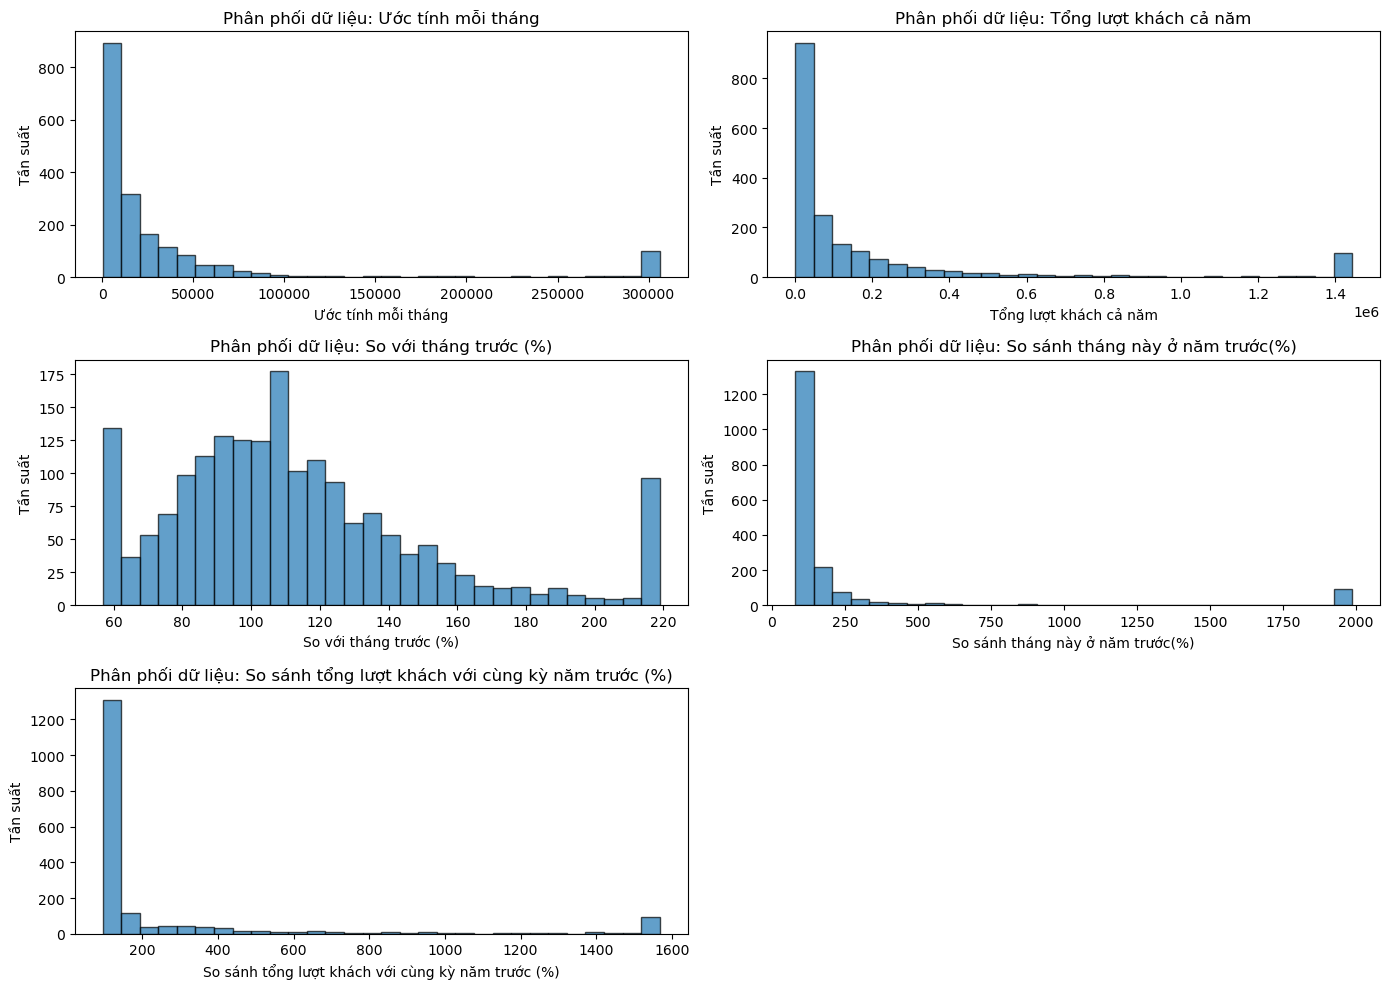

In [58]:
import matplotlib.pyplot as plt

# Vẽ biểu đồ phân phối dữ liệu sau khi Winsorization
plt.figure(figsize=(14, 10))

for i, col in enumerate(columns_to_convert, 1):
    plt.subplot(3, 2, i)
    plt.hist(data_no_covid_filtered[col], bins=30, edgecolor='k', alpha=0.7)
    plt.title(f'Phân phối dữ liệu: {col}')
    plt.xlabel(col)
    plt.ylabel('Tần suất')

plt.tight_layout()

In [59]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data_encoded = data_no_covid_filtered.copy()
data_encoded['Chỉ tiêu'] = label_encoder.fit_transform(data_encoded['Chỉ tiêu'])

In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Kiểm tra đa cộng tuyến (VIF)
X = data_encoded[['Ước tính mỗi tháng', 'Tổng lượt khách cả năm', 
                  'So với tháng trước (%)', 'So sánh tháng này ở năm trước(%)']]
X = X.dropna()
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif

,Variable,VIF
0,Ước tính mỗi tháng,8.599474
1,Tổng lượt khách cả năm,8.618343
2,So với tháng trước (%),1.518473
3,So sánh tháng này ở năm trước(%),1.347999


In [65]:
data_no_covid_filtered['Ước tính mỗi tháng'] = np.log1p(data_no_covid_filtered['Ước tính mỗi tháng'])
data_no_covid_filtered['Tổng lượt khách cả năm'] = np.log1p(data_no_covid_filtered['Tổng lượt khách cả năm'])

C:\Users\Admin\AppData\Local\Temp\ipykernel_12232\2661620574.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_covid_filtered['Ước tính mỗi tháng'] = np.log1p(data_no_covid_filtered['Ước tính mỗi tháng'])
C:\Users\Admin\AppData\Local\Temp\ipykernel_12232\2661620574.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_covid_filtered['Tổng lượt khách cả năm'] = np.log1p(data_no_covid_filtered['Tổng lượt khách cả năm'])


In [66]:
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Tạo biến đầu vào và đầu ra
X = data_no_covid_filtered[['Ước tính mỗi tháng', 'Tổng lượt khách cả năm', 
                            'So với tháng trước (%)', 'So sánh tháng này ở năm trước(%)']]
y = data_no_covid_filtered['So sánh tổng lượt khách với cùng kỳ năm trước (%)']

# Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 1. Huấn luyện mô hình Linear Regression (loại bỏ 'Tổng lượt khách cả năm')
X_train_lr = X_train.drop(columns=['Tổng lượt khách cả năm'])
X_test_lr = X_test.drop(columns=['Tổng lượt khách cả năm'])
lr = LinearRegression()
lr.fit(X_train_lr, y_train)
y_pred_lr = lr.predict(X_test_lr)
r2_lr = r2_score(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)

# 2. Huấn luyện Ridge Regression (giữ tất cả biến)
ridge = Ridge(alpha=1)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
r2_ridge = r2_score(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

# Kết quả so sánh
result = pd.DataFrame({
    'Model': ['Linear Regression (Loại biến)', 'Ridge Regression (Giữ tất cả biến)'],
    'R^2 Score': [r2_lr, r2_ridge],
    'MSE': [mse_lr, mse_ridge]
})

result


,Model,R^2 Score,MSE
0,Linear Regression (Loại biến),0.453993,57115.141265
1,Ridge Regression (Giữ tất cả biến),0.463733,56096.317663


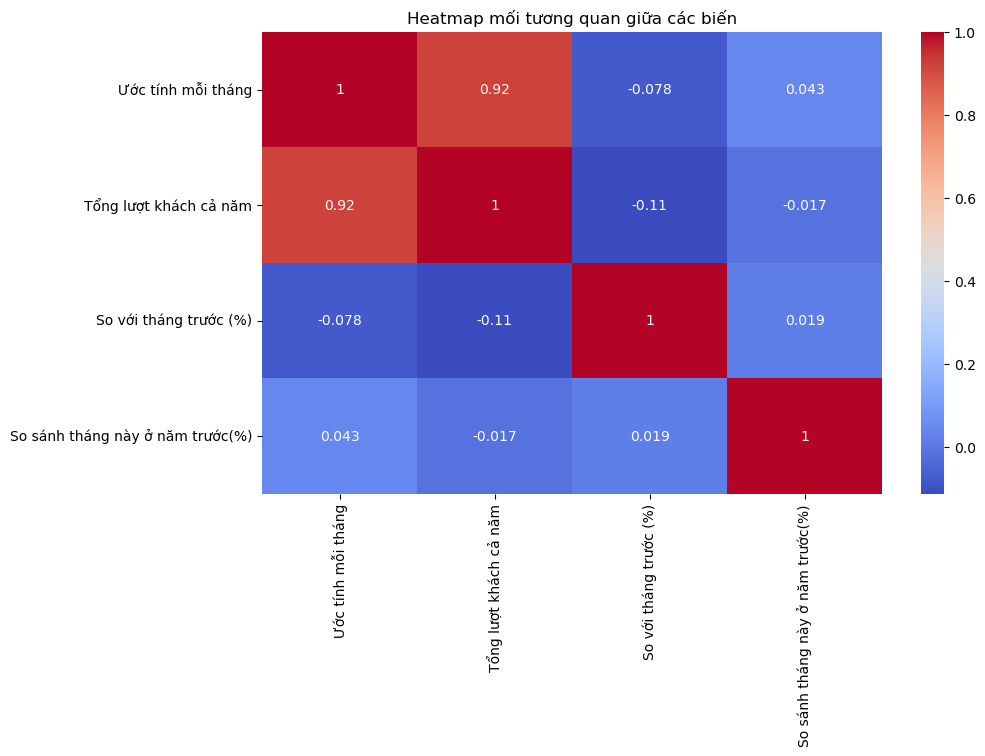

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')
plt.title("Heatmap mối tương quan giữa các biến")
plt.show()


In [64]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["Variable"] = X_train_lr.columns
vif["VIF"] = [variance_inflation_factor(X_train_lr.values, i) for i in range(X_train_lr.shape[1])]
print(vif)


                           Variable       VIF
0                Ước tính mỗi tháng  1.215090
1            So với tháng trước (%)  1.472782
2  So sánh tháng này ở năm trước(%)  1.324489


In [61]:
#Phân bố dữ liệu (skewness và kurtosis)
distribution = data_no_covid_filtered[columns_to_convert].describe()
skewness = data_no_covid_filtered[columns_to_convert].skew()
kurtosis = data_no_covid_filtered[columns_to_convert].kurt()
skewness,kurtosis

(Ước tính mỗi tháng                                   2.873922
 Tổng lượt khách cả năm                               2.698978
 So với tháng trước (%)                               1.037917
 So sánh tháng này ở năm trước(%)                     3.298048
 So sánh tổng lượt khách với cùng kỳ năm trước (%)    2.702700
 dtype: float64,
 Ước tính mỗi tháng                                   7.212355
 Tổng lượt khách cả năm                               6.510722
 So với tháng trước (%)                               0.935872
 So sánh tháng này ở năm trước(%)                     9.546013
 So sánh tổng lượt khách với cùng kỳ năm trước (%)    6.172548
 dtype: float64)